# Machine Learning Final Project
# Pet Adoption Prediction

### Author: Siran Fang, Jiaying Du, Yanan Wu

The goal of this project is predicting the speed at which a pet is adopted, based on the pet’s listing on PetFinder. Sometimes a profile represents a group of pets. In this case, the speed of adoption is determined by the speed at which all of the pets are adopted. The data included text, tabular, and image data.

In [3]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Import Data

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
all_dat = pd.concat([train, test])

/Users/AFF/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [6]:
all_dat.head()

,AdoptionSpeed,Age,Breed1,Breed2,Color1,Color2,Color3,Description,Dewormed,Fee,...,Name,PetID,PhotoAmt,Quantity,RescuerID,State,Sterilized,Type,Vaccinated,VideoAmt
0,2.0,3,299,0,1,7,0,Nibble is a 3+ month old ball of cuteness. He ...,2,100,...,Nibble,86e1089a3,1.0,1,8480853f516546f6cf33aa88cd76c379,41326,2,2,2,0
1,0.0,1,265,0,1,2,0,I just found it alone yesterday near my apartm...,3,0,...,No Name Yet,6296e909a,2.0,1,3082c7125d8fb66f7dd4bff4192c8b14,41401,3,2,3,0
2,3.0,1,307,0,2,7,0,Their pregnant mother was dumped by her irresp...,1,0,...,Brisco,3422e4906,7.0,1,fa90fa5b1ee11c86938398b60abc32cb,41326,2,1,1,0
3,2.0,4,307,0,1,2,0,"Good guard dog, very alert, active, obedience ...",1,150,...,Miko,5842f1ff5,8.0,1,9238e4f44c71a75282e62f7136c6b240,41401,2,1,1,0
4,2.0,1,307,0,1,0,0,This handsome yet cute boy is up for adoption....,2,0,...,Hunter,850a43f90,3.0,1,95481e953f8aed9ec3d16fc4509537e8,41326,2,1,2,0


In [7]:
all_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18965 entries, 0 to 3971
Data columns (total 24 columns):
AdoptionSpeed    14993 non-null float64
Age              18965 non-null int64
Breed1           18965 non-null int64
Breed2           18965 non-null int64
Color1           18965 non-null int64
Color2           18965 non-null int64
Color3           18965 non-null int64
Description      18952 non-null object
Dewormed         18965 non-null int64
Fee              18965 non-null int64
FurLength        18965 non-null int64
Gender           18965 non-null int64
Health           18965 non-null int64
MaturitySize     18965 non-null int64
Name             17297 non-null object
PetID            18965 non-null object
PhotoAmt         18965 non-null float64
Quantity         18965 non-null int64
RescuerID        18965 non-null object
State            18965 non-null int64
Sterilized       18965 non-null int64
Type             18965 non-null int64
Vaccinated       18965 non-null int64
VideoAmt  

### Data Cleaning

In [8]:
# Look for null values for all data
print(all_dat.isna().sum(axis = 0))

AdoptionSpeed    3972
Age                 0
Breed1              0
Breed2              0
Color1              0
Color2              0
Color3              0
Description        13
Dewormed            0
Fee                 0
FurLength           0
Gender              0
Health              0
MaturitySize        0
Name             1668
PetID               0
PhotoAmt            0
Quantity            0
RescuerID           0
State               0
Sterilized          0
Type                0
Vaccinated          0
VideoAmt            0
dtype: int64


In [9]:
# Look for null values for train data
print(train.isna().sum(axis = 0))

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64


In [10]:
# Look for null values for test data
print(test.isna().sum(axis = 0))

Type              0
Name            411
Age               0
Breed1            0
Breed2            0
Gender            0
Color1            0
Color2            0
Color3            0
MaturitySize      0
FurLength         0
Vaccinated        0
Dewormed          0
Sterilized        0
Health            0
Quantity          0
Fee               0
State             0
RescuerID         0
VideoAmt          0
Description       1
PetID             0
PhotoAmt          0
dtype: int64


In [11]:
# Remove rows with null values for train description
train = train.dropna(subset=['Description'])

## Exploratory Data Analysis

The response variable of this data is AdoptionSpeed. The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way: 

0 - Pet was adopted on the same day as it was listed. <br>
1 - Pet was adopted between 1 and 7 days (1st week) after being listed. <br>
2 - Pet was adopted between 8 and 30 days (1st month) after being listed. <br>
3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed. <br>
4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

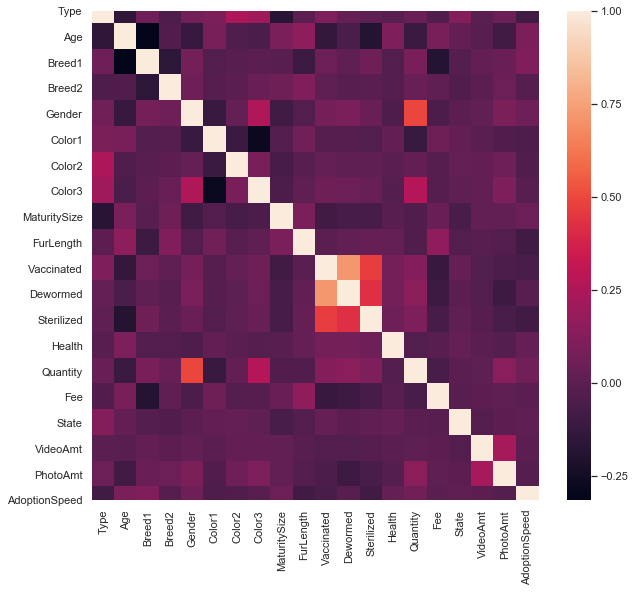

In [12]:
# correlation plot for train
import seaborn as sns; 
sns.set(style="whitegrid")

corr = train[train._get_numeric_data().columns].corr()
fig, ax = plt.subplots(figsize=(10,9))  
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, ax=ax)

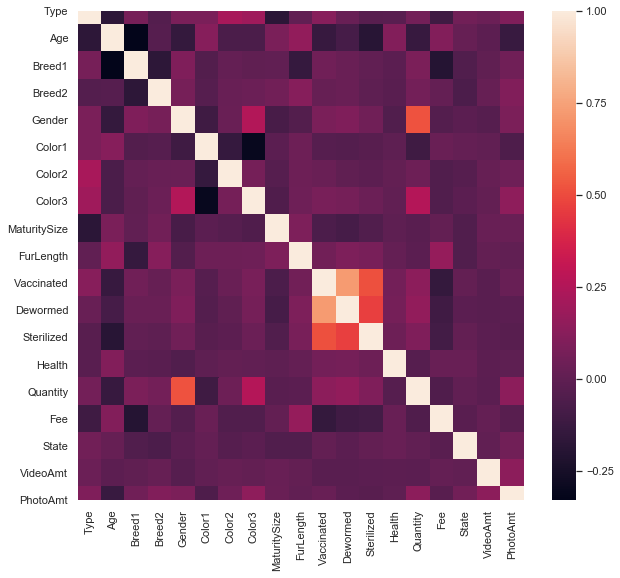

In [13]:
# correlation plot for test
sns.set(style="whitegrid")
corr = test[test._get_numeric_data().columns].corr()
fig, ax = plt.subplots(figsize=(10,9))  
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, ax=ax)

#### Adoption Speed

Text(0.5, 1.0, 'Adoption Speed (Target Variable)')

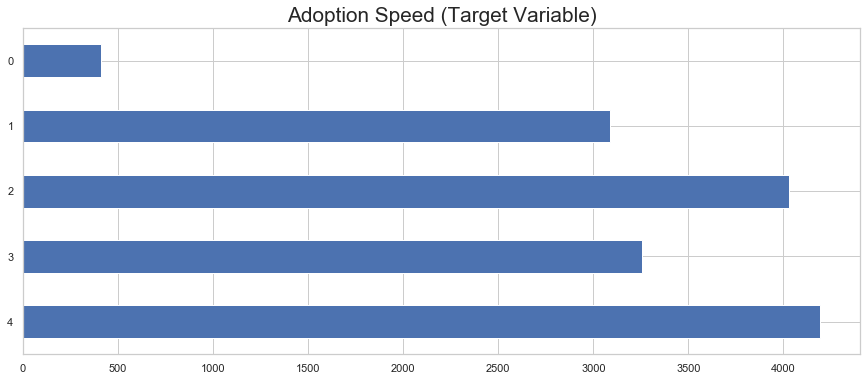

In [16]:
train['AdoptionSpeed'].value_counts().sort_index(ascending=False).plot(kind='barh',figsize=(15,6))
plt.title('Adoption Speed (Target Variable)', fontsize='xx-large')

The dataset is imbalanced. The class 0 is minority. Using SMOTE or bagging.

#### Type

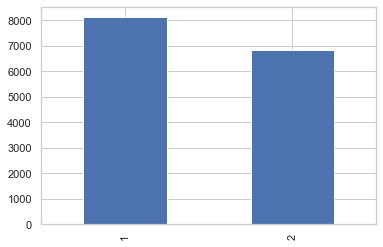

In [17]:
# Type - Type of animal (1 = Dog, 2 = Cat)
train['Type'].value_counts().plot.bar()

#### Age

(array([1.780e+02, 2.303e+03, 3.500e+03, 1.965e+03, 1.109e+03, 5.950e+02,
        5.570e+02, 2.800e+02, 3.090e+02, 1.840e+02, 1.620e+02, 9.400e+01,
        9.670e+02, 4.000e+01, 7.600e+01, 7.900e+01, 5.000e+01, 6.700e+01,
        1.650e+02, 2.500e+01, 3.200e+01, 2.800e+01, 1.900e+01, 8.000e+00,
        6.510e+02, 9.000e+00, 1.300e+01, 1.700e+01, 1.300e+01, 2.500e+01,
        5.200e+01, 8.000e+00, 1.500e+01, 4.000e+00, 5.000e+00, 3.000e+00,
        4.170e+02, 7.000e+00, 8.000e+00, 7.000e+00, 2.000e+00, 1.000e+01,
        2.200e+01, 1.000e+00, 1.000e+00, 2.000e+00, 5.000e+00, 2.000e+00,
        2.410e+02, 6.000e+00, 8.000e+00, 7.000e+00, 4.000e+00, 8.000e+00,
        1.500e+01, 6.000e+00, 3.000e+00, 2.000e+00, 0.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 5

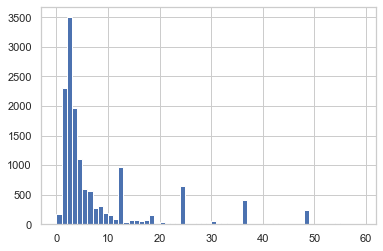

In [18]:
# Age - Age of pet when listed, in months
plt.hist(train['Age'],bins=list(range(0,60,1)))

### Name

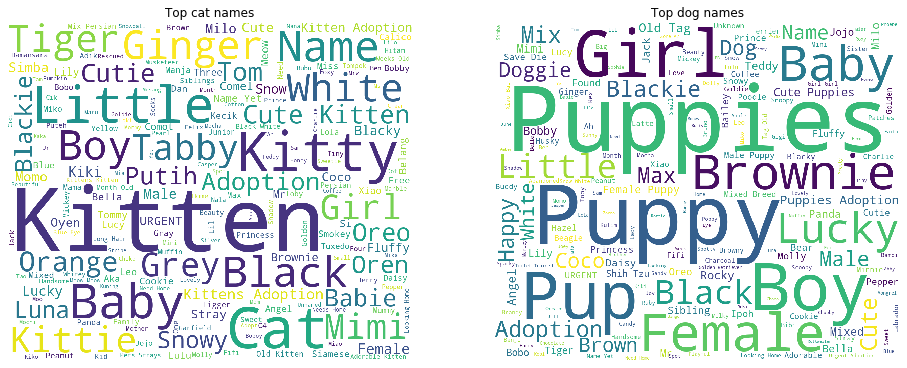

In [9]:
fig, ax = plt.subplots(figsize = (16, 12))
plt.subplot(1, 2, 1)
text_cat = ' '.join(all_dat.loc[all_dat['Type'] == 2, 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top cat names')
plt.axis("off")

plt.subplot(1, 2, 2)
text_dog = ' '.join(all_dat.loc[all_dat['Type'] == 1, 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Top dog names')
plt.axis("off")

plt.show()

In [11]:
print('Most popular pet names and AdoptionSpeed')
for n in train['Name'].value_counts().index[:5]:
    print(n)
    print(train.loc[train['Name'] == n, 'AdoptionSpeed'].value_counts().sort_index())
    print('')
    

Most popular pet names and AdoptionSpeed
Baby
0     2
1    11
2    15
3    11
4    27
Name: AdoptionSpeed, dtype: int64

Lucky
0     5
1    14
2    16
3    12
4    17
Name: AdoptionSpeed, dtype: int64

Brownie
0     1
1    11
2    14
3    12
4    16
Name: AdoptionSpeed, dtype: int64

No Name
0     3
1    14
2    11
3     6
4    20
Name: AdoptionSpeed, dtype: int64

Mimi
0     3
1    12
2    13
3     7
4    17
Name: AdoptionSpeed, dtype: int64



In [13]:
train['Name'] = train['Name'].fillna('Unnamed')
test['Name'] = test['Name'].fillna('Unnamed')
all_data['Name'] = all_data['Name'].fillna('Unnamed')

train['No_name'] = 0
train.loc[train['Name'] == 'Unnamed', 'No_name'] = 1
test['No_name'] = 0
test.loc[test['Name'] == 'Unnamed', 'No_name'] = 1
all_data['No_name'] = 0
all_data.loc[all_data['Name'] == 'Unnamed', 'No_name'] = 1

print(f"Rate of unnamed pets in train data: {train['No_name'].sum() * 100 / train['No_name'].shape[0]:.4f}%.")
print(f"Rate of unnamed pets in test data: {test['No_name'].sum() * 100 / test['No_name'].shape[0]:.4f}%.")

Rate of unnamed pets in train data: 8.4173%.
Rate of unnamed pets in test data: 10.3474%.


### Age

Text(0.5, 0, 'Age in months')

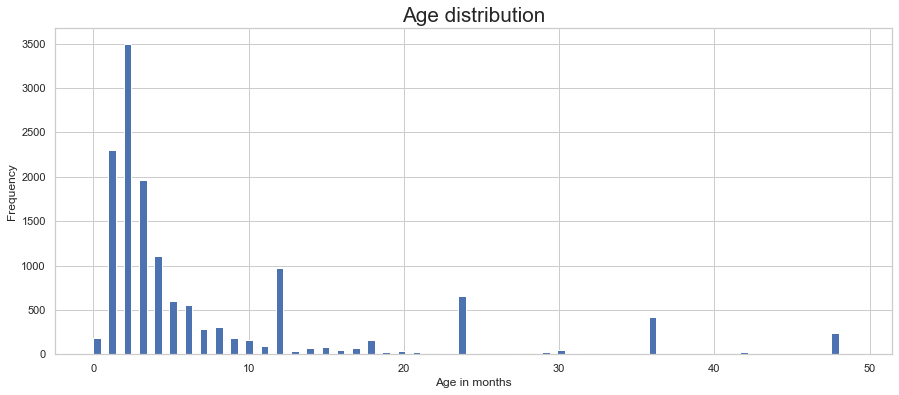

In [32]:
# Age distribution 
train['Age'][train['Age'] < 50].plot(kind = 'hist', 
                                           bins = 100, 
                                           figsize = (15,6), 
                                           title = 'Age distribution')

plt.title('Age distribution', fontsize = 'xx-large')
plt.xlabel('Age in months')

### Gender

Text(0.5, 1.0, 'Gender distribution')

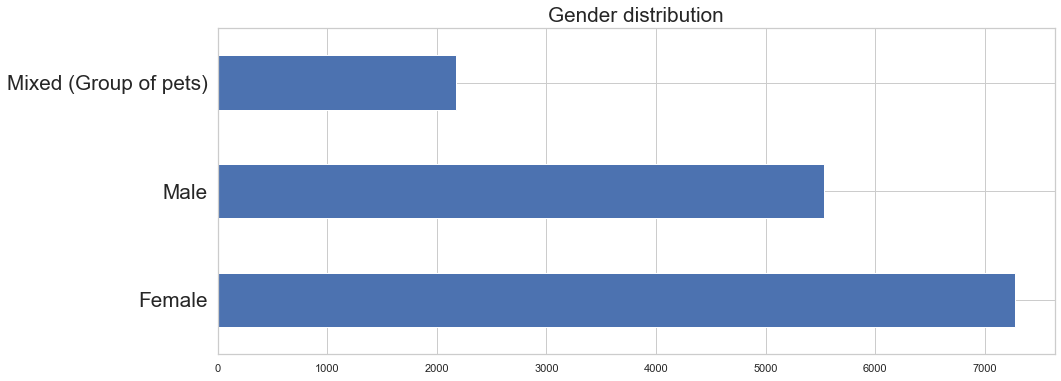

In [30]:
# Gender distribution
train['Gender'].value_counts().rename({1:'Male',
                                       2:'Female',
                                       3:'Mixed (Group of pets)'}).plot(kind = 'barh', 
                                                                           figsize = (15,6))
plt.yticks(fontsize = 'xx-large')
plt.title('Gender distribution', fontsize = 'xx-large')

### Description

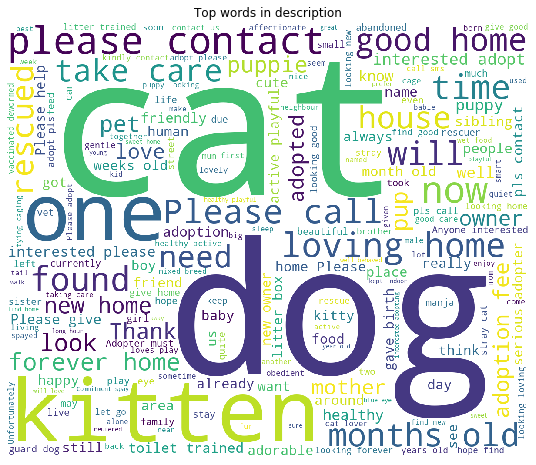

In [18]:
fig, ax = plt.subplots(figsize = (12, 8))
text_cat = ' '.join(all_dat['Description'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top words in description');
plt.axis("off");

#### PhotoAmt

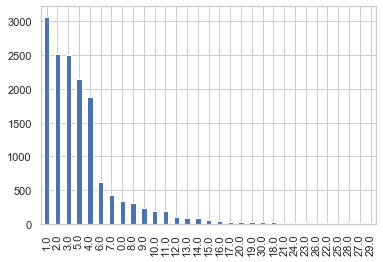

In [21]:
# PhotoAmt - Total uploaded photos for this pet
train['PhotoAmt'].value_counts().plot.bar()

### Pure_Breeds

In [16]:
train['Pure_breed'] = 0
train.loc[train['Breed2'] == 0, 'Pure_breed'] = 1
test['Pure_breed'] = 0
test.loc[test['Breed2'] == 0, 'Pure_breed'] = 1
all_data['Pure_breed'] = 0
all_data.loc[all_data['Breed2'] == 0, 'Pure_breed'] = 1

print(f"Rate of pure breed pets in train data: {train['Pure_breed'].sum() * 100 / train['Pure_breed'].shape[0]:.4f}%.")
print(f"Rate of pure breed pets in test data: {test['Pure_breed'].sum() * 100 / test['Pure_breed'].shape[0]:.4f}%.")

Rate of pure breed pets in train data: 71.7802%.
Rate of pure breed pets in test data: 74.6979%.


In [23]:
def generate_groupBY_data(col_name):
    l = train.groupby(['AdoptionSpeed', col_name])[['PetID']].count().reset_index().rename(
        columns={'PetID':'count'})
    count_pets = train.groupby(['AdoptionSpeed', col_name])[['PetID']].count().reset_index().groupby(
        [col_name]).sum()[['PetID']].reset_index()
    new_col_name = 'total_pets_by' + col_name
    count_pets.rename(columns={'PetID': new_col_name}, inplace=True)

    temp = l.merge(count_pets, on=[col_name], how='left')
    temp['fraction'] = temp['count'] * 100 / temp[new_col_name]

    temp = temp.pivot("AdoptionSpeed", col_name, "fraction")
    
    return temp

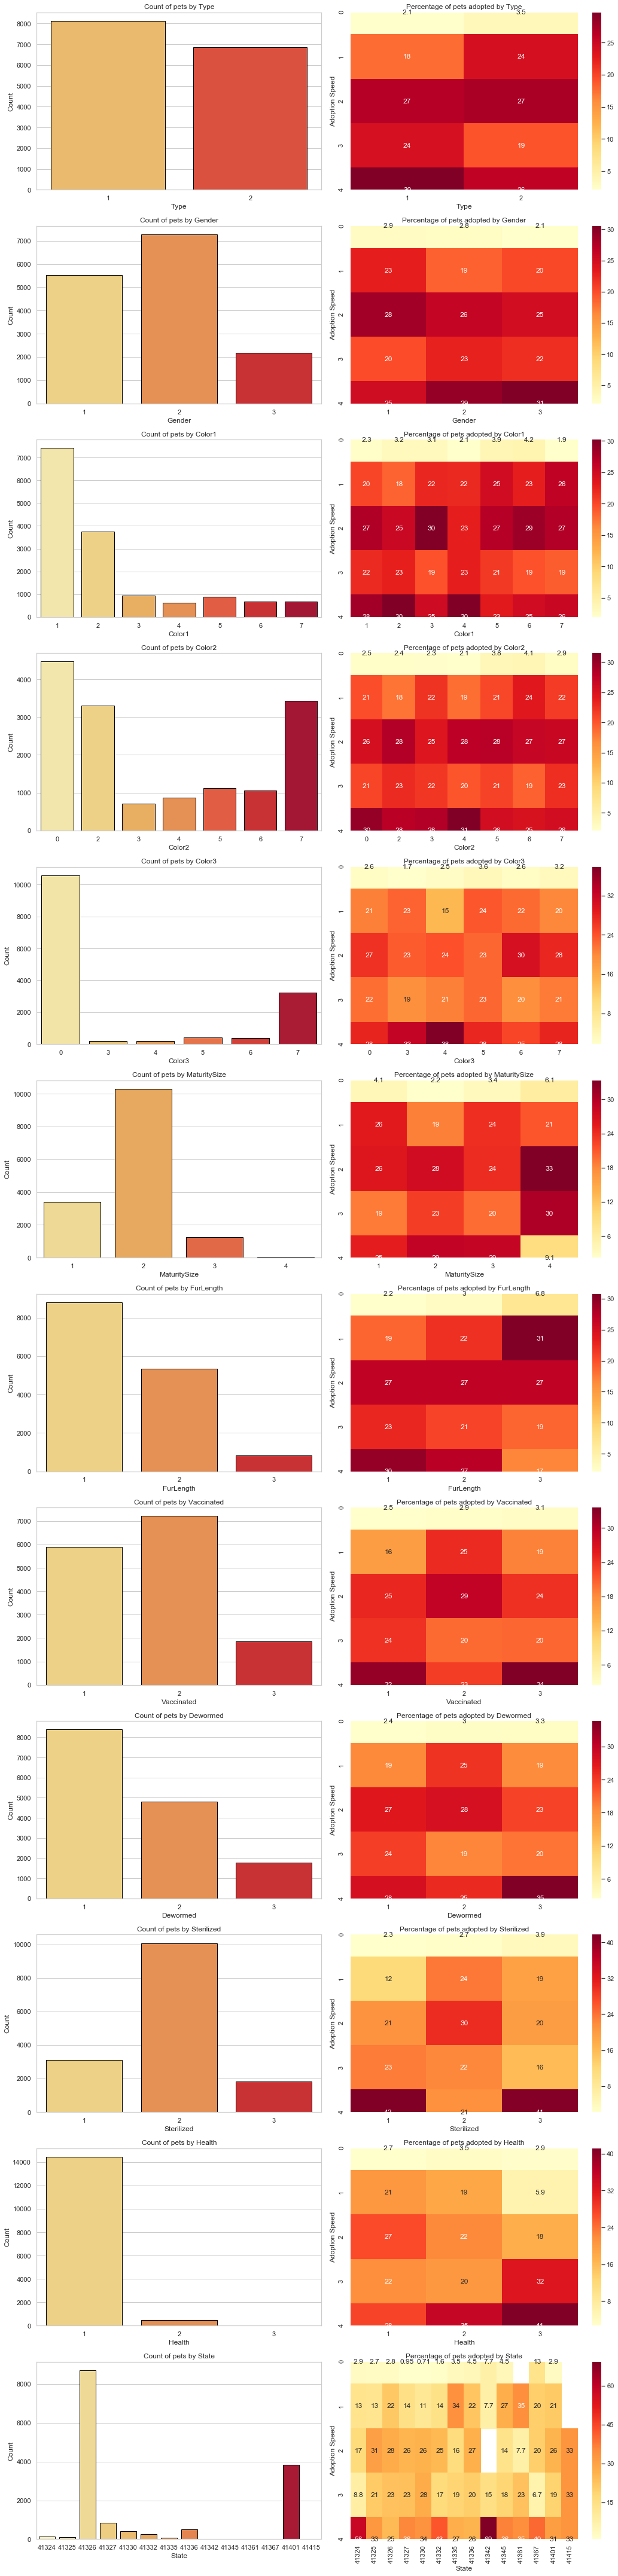

In [24]:
list_cols = ['Type', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
            'Sterilized', 'Health', 'State']

cols = 2
rows = len(list_cols)

fig = plt.figure(figsize=(15,5*rows))
fig_no = 0

for col in list_cols:
    fig_no += 1
    ax = fig.add_subplot(rows, cols, fig_no)
    sns.countplot(x=col, data=train, palette="YlOrRd", edgecolor="black")
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title('Count of pets by ' + col)
    
    temp = generate_groupBY_data(col)
    fig_no += 1
    ax = fig.add_subplot(rows, cols, fig_no)
    sns.heatmap(temp, annot=True, cmap='YlOrRd')
    ax.set_xlabel(col)
    ax.set_ylabel('Adoption Speed')
    ax.set_title('Percentage of pets adopted by ' + col)

fig.tight_layout()
plt.show()

## Modeling